In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

#variable path to contain directory with Yelp data
path = '/home/dummy_user/badams_testing/'

In [143]:
dat = pd.read_csv(path + 'Lab 2 Output.csv')

In [144]:
dat.head()

,Unnamed: 0,review_id,user_id,name,review_count,yelping_since,average_stars,business_id,stars,date,...,longitude,is_open,categories,stars_min,stars_max,stars_mean,business_id_nunique,Bad,Good,good_pct
0,0,VlnFxMkR76-BbA0JuATFXg,_5keMAmic7zzrnM5mVefBw,Laurie,733,2009-04-11,3.53,R1jJQi2yR44D_2ileqr8kA,4,2017-01-04,...,-80.861156,1,Vegan;Vegetarian;Live/Raw Food;Restaurants,1,5,3.637681,69,9,60,0.869565
1,1,O5DExInZEcnOZemKI0Olbg,_5keMAmic7zzrnM5mVefBw,Laurie,733,2009-04-11,3.53,M0pkmBUi_CI0qrzN7ee80Q,5,2016-04-15,...,-80.845140,1,Bakeries;Cafes;Food;Coffee & Tea;Restaurants,1,5,3.637681,69,9,60,0.869565
2,2,Qkimoeyo0tbxPpmsrB0AXg,_5keMAmic7zzrnM5mVefBw,Laurie,733,2009-04-11,3.53,T2tEMLpTeSMxLKpxwFdS3g,2,2016-10-19,...,-80.805827,1,Latin American;Mexican;Restaurants;Seafood,1,5,3.637681,69,9,60,0.869565
3,3,0N9Xhr66O6OnPL__joS3pA,_5keMAmic7zzrnM5mVefBw,Laurie,733,2009-04-11,3.53,xJAXkMIgnWNpqyGCosmp2Q,4,2017-02-24,...,-80.876533,1,Vietnamese;Restaurants;Bubble Tea;Food;Sandwic...,1,5,3.637681,69,9,60,0.869565
4,4,HsGRm5ooJ4EPZvYuXzYoBQ,_5keMAmic7zzrnM5mVefBw,Laurie,733,2009-04-11,3.53,bfVpHvjir2G2Z9wVeddw4w,5,2014-10-07,...,-80.881973,1,Event Planning & Services;Restaurants;Food;Bre...,1,5,3.637681,69,9,60,0.869565


In [145]:
dat['yelping_since'] = pd.to_datetime(dat['yelping_since'])
dat['date'] = pd.to_datetime(dat['date'])

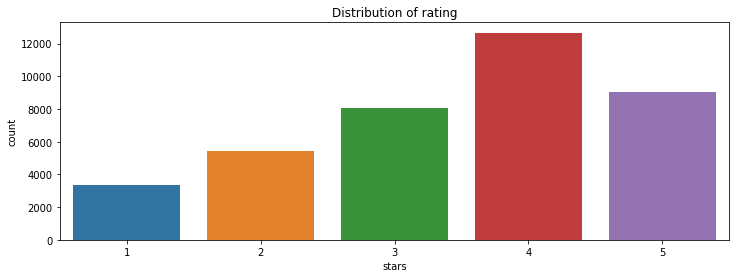

In [92]:
plt.figure(figsize=(12,4))
ax = sns.countplot(dat['stars'])
plt.title('Distribution of rating');

In [146]:
dat = dat.set_index('date')

In [147]:
print(dat.isnull().sum())

Unnamed: 0                0
review_id                 0
user_id                   0
name                      0
review_count              0
yelping_since             0
average_stars             0
business_id               0
stars                     0
business_name             0
neighborhood           8725
postal_code              18
latitude                  0
longitude                 0
is_open                   0
categories                0
stars_min                 0
stars_max                 0
stars_mean                0
business_id_nunique       0
Bad                       0
Good                      0
good_pct                  0
dtype: int64


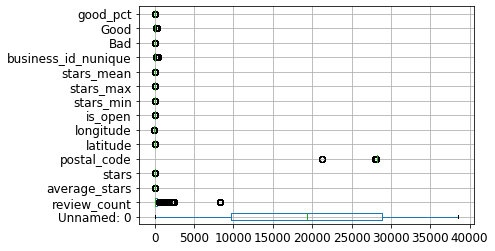

In [149]:
dat.boxplot(fontsize =12, vert=False)
plt.show()

In [150]:
# Print the name of the time series with the highest mean
print(dat.describe().loc['mean'][dat.describe().loc['mean'] == dat.describe().loc['mean'].max()].index.values[0])

# Print the name of the time series with the highest variability
print(dat.describe().loc['std'][dat.describe().loc['std'] == dat.describe().loc['std'].max()].index.values[0])

postal_code
Unnamed: 0


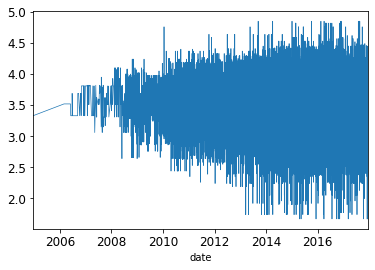

In [159]:
dat_subset = dat[['name', 'business_name', 'average_stars', 'neighborhood', 'categories']]

ax = dat_subset.plot(subplots=True,
                      layout=(1, 1),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=12,
                      legend=False)

plt.show()

239102

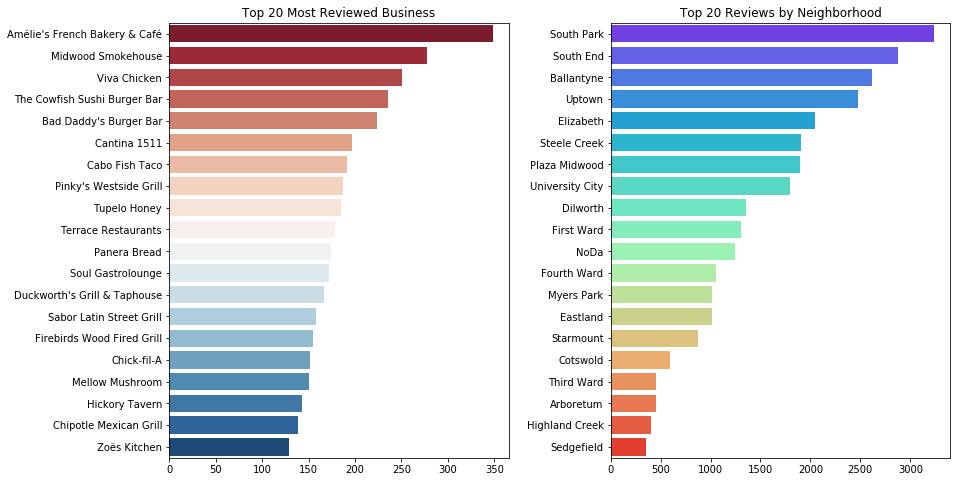

In [99]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = dat['business_name'].value_counts()[:20].to_frame()

sns.barplot(cnt['business_name'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top 20 Most Reviewed Business')

cnt = dat['neighborhood'].value_counts()[:20].to_frame()

sns.barplot(cnt['neighborhood'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top 20 Reviews by Neighborhood')
plt.subplots_adjust(wspace=0.3)
gc.collect()

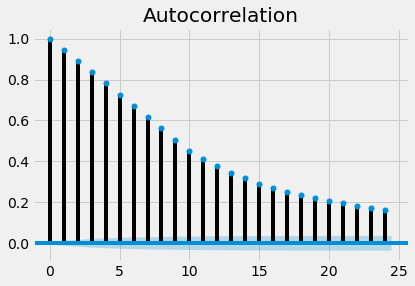

In [160]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(dat['average_stars'], lags=24)
plt.show()

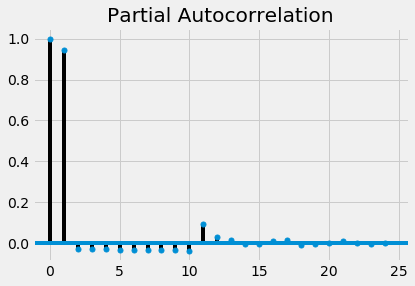

In [161]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_pacf(dat['average_stars'], lags=24)
plt.show()

5926

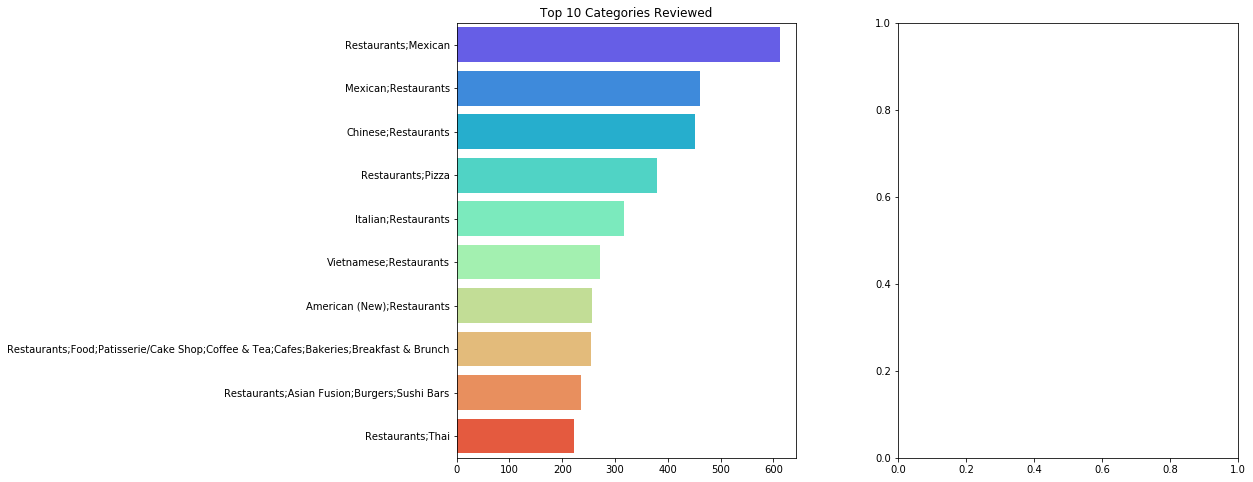

In [113]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()

cnt = dat['categories'].value_counts()[:10].to_frame()

sns.barplot(cnt['categories'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top 10 Categories Reviewed')
plt.subplots_adjust(wspace=0.3)
gc.collect()

In [25]:
dat['yelping_since'] = pd.to_datetime(dat['yelping_since'])
dat['date'] = pd.to_datetime(dat['date'])

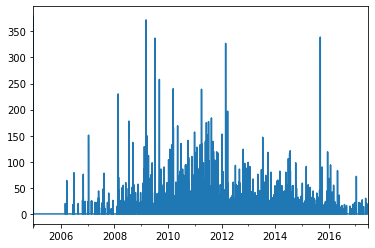

In [26]:
#number of registered users by year
test_series = dat['yelping_since'].value_counts()

test_series.resample('D').sum().plot()

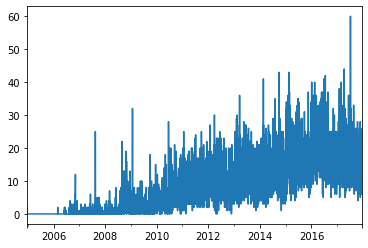

In [27]:
#review date
review_series = dat['date'].value_counts()

review_series.resample('D').sum().plot()

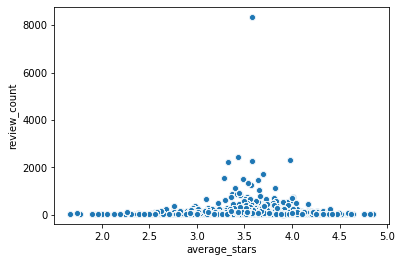

In [30]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y="review_count", x="average_stars",
                     palette=cmap, sizes=(10, 200),
                     data=dat)

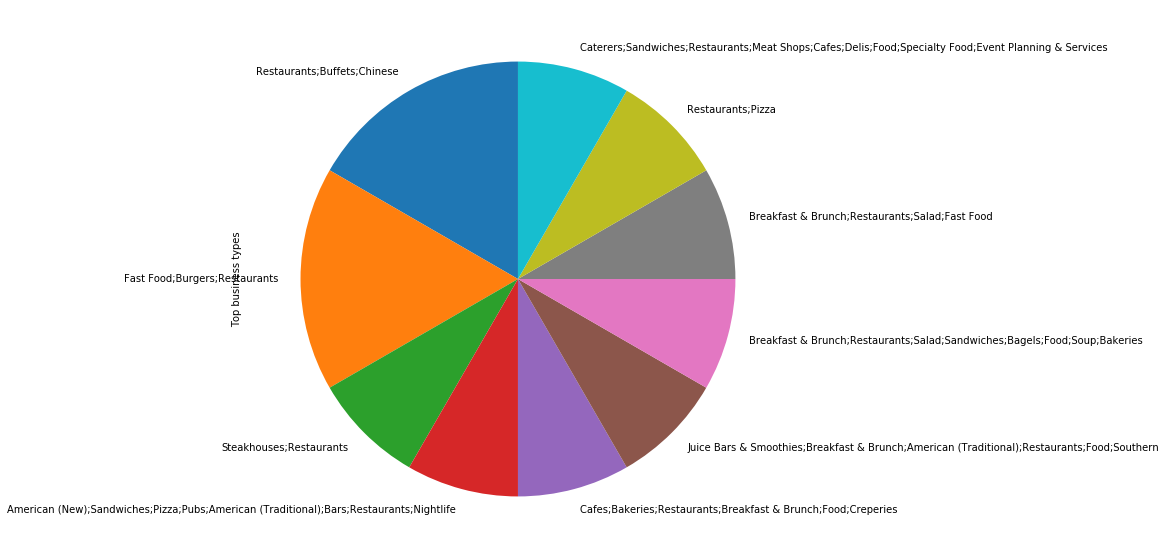

In [37]:
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = dat.sort_values("review_count")[::-1][:top_business]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90)

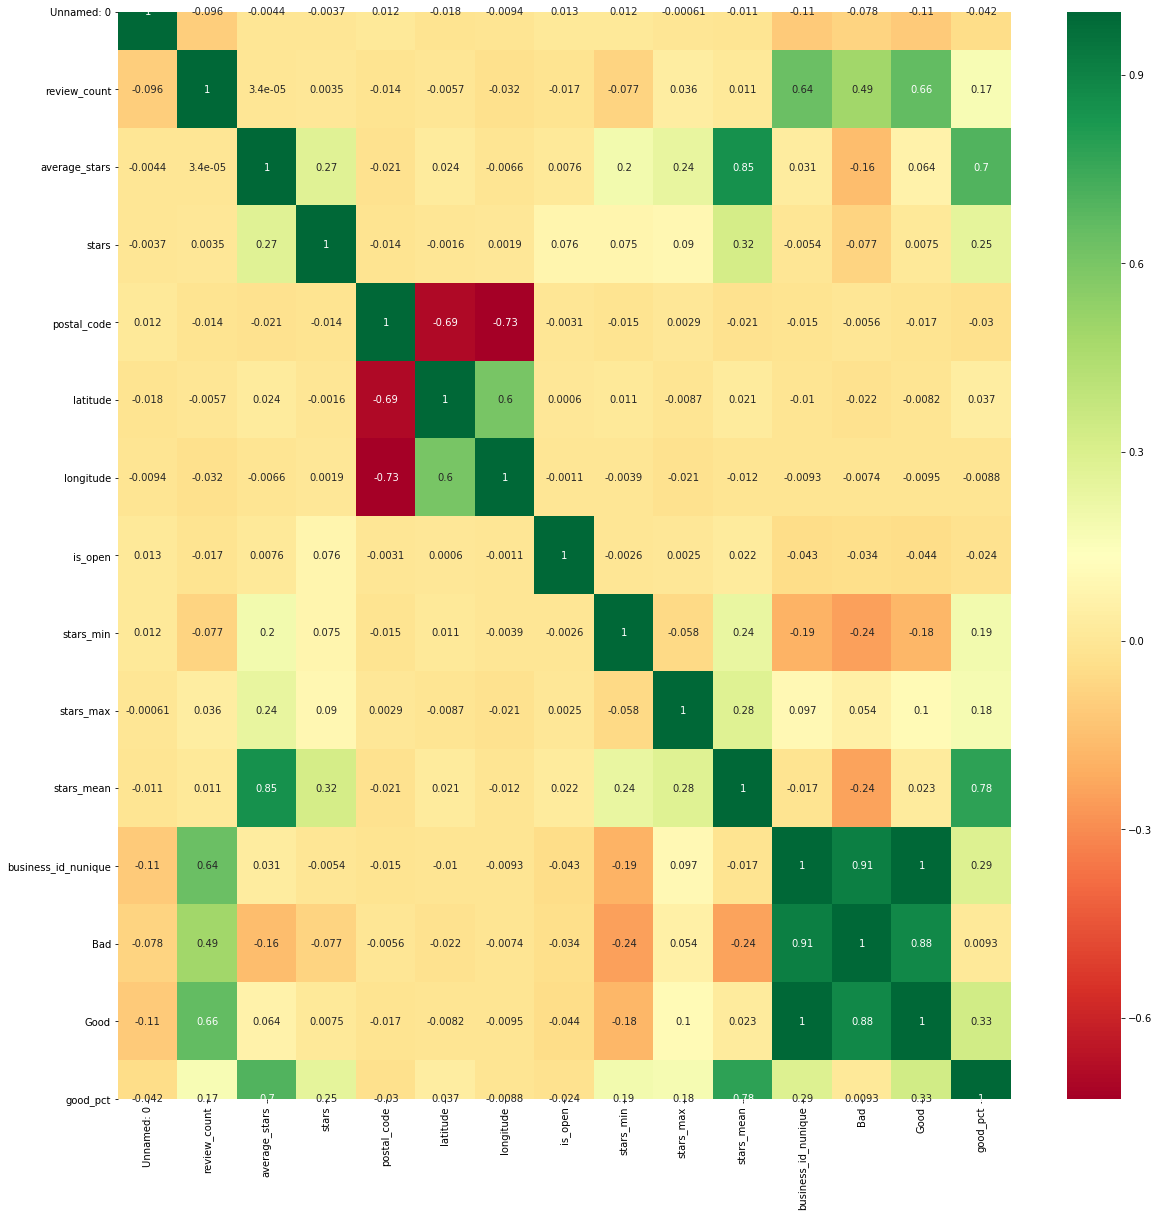

In [51]:
corrmat = dat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

autocor = dat['stars'].autocorr()
autocor

nobs = len(dat)

conf = 1.96/sqrt(nobs)

plot_acf(dat, alpha=0.05, lags=20)
plt.show()

In [192]:
dat_index = dat[['average_stars']]

In [79]:
dat_index = dat_index.set_index('date')

In [193]:
dat_index[10:]

,average_stars
date,
2014-05-23,3.53
2017-05-16,3.53
2017-05-09,3.53
2016-08-02,3.53
2015-07-08,3.53
...,...
2015-08-14,2.80
2016-08-01,2.80
2016-12-08,2.80


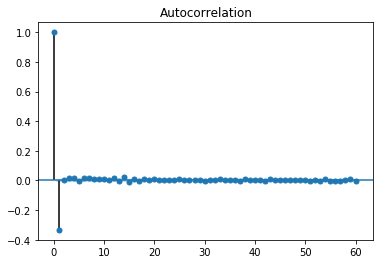

In [84]:
change = dat_index.pct_change()
change = change.dropna()

plot_acf(change, lags=60)
plt.show()

In [86]:
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(change, order=(0,1))
res = mod.fit()
print(res.params)

const          0.223928
ma.L1.stars   -0.364254
dtype: float64


/home/centos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


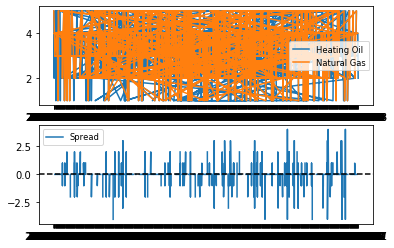

In [125]:
###this could be used if I decided to look at the comparison between two different categories

# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(mex_ind, label='Heating Oil')
plt.plot(chi_ind, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(mex_ind-chi_ind, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [119]:
mex = dat[(dat.categories == 'Restaurants;Mexican') | (dat.categories == 'Mexican;Restaurants')].copy()
chi = dat[dat.categories == 'Restaurants;Mexican'].copy()

In [87]:
dat['categories'].value_counts()

Restaurants;Mexican                                            613
Mexican;Restaurants                                            462
Chinese;Restaurants                                            451
Restaurants;Pizza                                              379
Italian;Restaurants                                            318
                                                              ... 
Sandwiches;Salad;Restaurants;American (Traditional);Burgers      1
Restaurants;Chicken Wings;Burgers;Delis                          1
Tacos;Mexican;Food;Restaurants;Fish & Chips;Food Trucks          1
Restaurants;Mexican;Latin American                               1
Fast Food;Hot Dogs;Burgers;Restaurants                           1
Name: categories, Length: 1633, dtype: int64

In [118]:
mex.head()

,Unnamed: 0,review_id,user_id,name,review_count,yelping_since,average_stars,business_id,stars,date,...,longitude,is_open,categories,stars_min,stars_max,stars_mean,business_id_nunique,Bad,Good,good_pct
92,92,qcUBLGK_yDxhcWA1H_T4yA,KsK2VrCDys9hzpT5JMkkNw,Ian,190,2010-01-27,4.02,4X4a-TJnivv8YtK1YGxcQQ,5,2015-03-27,...,-80.794769,0,Restaurants;Mexican,1,5,3.852273,88,12,76,0.863636
104,104,gkT3fP4RkWTUa2VqbQOKsQ,KsK2VrCDys9hzpT5JMkkNw,Ian,190,2010-01-27,4.02,b8fEuQPrf383f6pzdm8-1w,2,2011-01-23,...,-80.841993,1,Mexican;Restaurants,1,5,3.852273,88,12,76,0.863636
238,238,ddIcZWnZFPUuOgGNtAuKJg,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,sH3UsolKjik01u0HlQ9_0Q,4,2015-10-04,...,-80.794811,1,Restaurants;Mexican,1,5,3.766234,77,9,68,0.883117
248,248,e0ezp8sQmojqM1f3HyUpMA,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,-pL4Id5cuz2yC2UKi2Yq9A,3,2016-01-03,...,-80.768692,1,Restaurants;Mexican,1,5,3.766234,77,9,68,0.883117
255,255,HY12QAnXLfvSd7B2n3WxrQ,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,8YyBAyA3TKpaVxy99FRWjA,4,2016-02-17,...,-80.724817,1,Mexican;Restaurants,1,5,3.766234,77,9,68,0.883117


In [120]:
chi.head()

,Unnamed: 0,review_id,user_id,name,review_count,yelping_since,average_stars,business_id,stars,date,...,longitude,is_open,categories,stars_min,stars_max,stars_mean,business_id_nunique,Bad,Good,good_pct
92,92,qcUBLGK_yDxhcWA1H_T4yA,KsK2VrCDys9hzpT5JMkkNw,Ian,190,2010-01-27,4.02,4X4a-TJnivv8YtK1YGxcQQ,5,2015-03-27,...,-80.794769,0,Restaurants;Mexican,1,5,3.852273,88,12,76,0.863636
238,238,ddIcZWnZFPUuOgGNtAuKJg,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,sH3UsolKjik01u0HlQ9_0Q,4,2015-10-04,...,-80.794811,1,Restaurants;Mexican,1,5,3.766234,77,9,68,0.883117
248,248,e0ezp8sQmojqM1f3HyUpMA,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,-pL4Id5cuz2yC2UKi2Yq9A,3,2016-01-03,...,-80.768692,1,Restaurants;Mexican,1,5,3.766234,77,9,68,0.883117
282,282,9jlzRgLpgXUZKarg-5S0Sg,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,MV9fUwgI2AQa4uZArynRlA,4,2014-01-25,...,-80.868412,1,Restaurants;Mexican,1,5,3.766234,77,9,68,0.883117
289,289,mmCjZzJsBOo3HTcCXqhPfw,UbRTTaGMwOOvlRJ2KvU3ng,Weekendgirl,116,2011-04-09,3.66,ZwZmoaFB5oo-pkOMBeLZDA,3,2014-05-28,...,-80.796645,0,Restaurants;Mexican,1,5,3.766234,77,9,68,0.883117


In [122]:
mex_ind = mex[['date', 'stars']]
mex_ind = mex_ind.set_index('date')

chi_ind = chi[['date', 'stars']]
chi_ind = chi_ind.set_index('date')


,stars
date,
2015-03-27,5
2011-01-23,2
2015-10-04,4
2016-01-03,3
2016-02-17,4
2014-06-07,5
2011-04-10,1
2015-02-12,5
2014-01-25,4


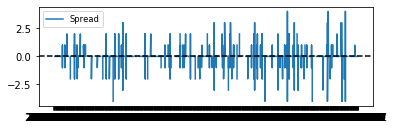

In [127]:
# Plot the spread
plt.subplot(2,1,2)
plt.plot(mex_ind-chi_ind, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [129]:
from statsmodels.tsa.stattools import adfuller

result_HO = adfuller(mex_ind['stars'])
print("The p-value for the ADF test on Mex is ", result_HO[1])
result_NG = adfuller(chi_ind['stars'])
print("The p-value for the ADF test on Chi is ", result_NG[1])

The p-value for the ADF test on Mex is  5.532349598446888e-30
The p-value for the ADF test on Chi is  0.0


In [133]:
mex_ind.index = pd.to_datetime(mex_ind.index)

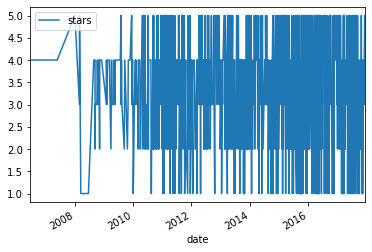

In [134]:
mex_ind.plot()
plt.show()

In [135]:
result = adfuller(mex_ind['stars'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  5.532349598446888e-30


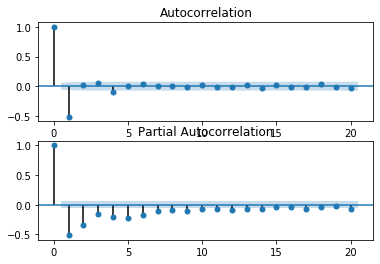

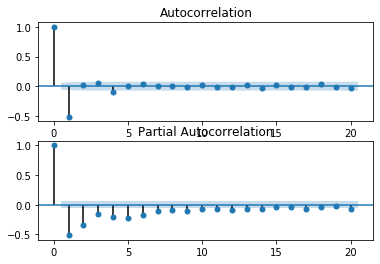

In [137]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

chg_star = mex_ind.diff()
chg_star = chg_star.dropna()

fig, axes = plt.subplots(2, 1)

plot_acf(chg_star, lags=20, ax=axes[0])

plot_pacf(chg_star, lags=20, ax=axes[1])

In [138]:
mod_ar1 = ARMA(chg_star, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_star, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_star, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11)

/home/centos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/centos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/centos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The AIC for an AR(1) is:  3925.5922871040866
The AIC for an AR(2) is:  3794.7966736724356
The AIC for an ARMA(1,1) is:  <statsmodels.tsa.arima_model.ARMAResultsWrapper object at 0x7f6048c574e0>


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

mod = ARIMA(data_set, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='2010-01-01', end='2046-01-01')
plt.show()

In [187]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(dat_index)

# Print the seasonality component
print(decomposition.seasonal)

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [165]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

NameError: name 'decomposition' is not defined

In [173]:
dat_ = np.array(covMat, dtype=float)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38573 entries, 2017-01-04 to 2016-07-11
Data columns (total 1 columns):
average_stars    38573 non-null float64
dtypes: float64(1)
memory usage: 602.7 KB


In [191]:
dat_index.head()

,average_stars
date,


In [180]:
dat_index.describe()

,average_stars
count,38573.000000
mean,3.588326
std,0.395046
min,1.670000
25%,3.390000
50%,3.620000
75%,3.830000
max,4.850000


In [194]:
dat_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38573 entries, 2017-01-04 to 2016-07-11
Data columns (total 1 columns):
average_stars    38573 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [196]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(dat_index)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None